# Desarrollo del software de anclajes

## Importar librerías

In [21]:
from    tkinter             import *
from    tkinter             import ttk 
import  tkinter             as tk
import  matplotlib.pyplot   as plt
from    matplotlib.backends.backend_tkagg import FigureCanvasTkAgg , NavigationToolbar2Tk #Realizar gráficos en tkinter con la librería plt
from    PIL                 import ImageTk, Image # Cargar imagenes a la ventana
import  numpy               as np
from    math                import *
import  pandas              as pd
from tkinter.font import Font
from scipy.stats import linregress

## Iniciar ventana

In [22]:
root = Tk() #Crea la ventana de la aplicación, esto importante en caso de crear más de una ventana

## Diseño de ventana

In [23]:
root.title("Anclajes V.01")
frm = ttk.Frame(root , relief=SOLID) #Crea un recuadro
frm.grid(row=0, column=0) #Al recuadro se da formato grilla

## Font

In [24]:
# Font of the titles
font_title      = Font(weight="bold" , size=10 , family='Helvetica' ,underline=True)

# Font of the labels
font_label      = Font(weight='bold' , size=8 , family='Helvetica')

## Datos iniciales

In [25]:
Label_nombre_anclaje          = Label(frm, text="ID Anclaje" , font=font_label).grid(column=0 , row= 0)         
Entry_nombre_anclaje          = Entry(frm , justify='center').grid(column=1 , row= 0)

Label_Nivel                   = Label(frm, text="Nivel" , font=font_label).grid(column=0 , row= 1)
Entry_nivel                   = Entry(frm, justify='center').grid(column=1 , row= 1)

Division                      = DoubleVar()
Division.set(0.01)
Label_Division                = Label(frm, text='Div.Instrumento' , font=font_label).grid(column=4 , row=0)
Entry_Division                = Entry(frm, textvariable=Division , justify='center')
Entry_Division.grid(column=5 , row=0)

Label_Fecha                   = Label(frm, text='Fecha' , font=font_label).grid(column=4 , row=1)
Entry_Fecha                   = Entry(frm , justify='center').grid(column=5 , row=1)

Percentage_load_step          = [0.15 , 0.25 , 0.50 , 0.75 , 0.95 , 1.00]
Percentage_creep_step         = [1.00 , 1.00 , 1.00 , 1.00 , 1.00]            
Percentage_download_step      = [0.85 , 0.75 , 0.65 , 0.50]
Percentage_reload_step        = [0.65 , 0.75 , 0.85 , 1.00]
Percentage_lockoff_step       = [0.95 , 0.80 , 0.70 , 0.60]

Label_Step                    = Label(frm, text='Escalón de carga' , font=font_label).grid(column=0 , row=8) # Etiqueta de la columna Porcentaje
Label_Presion                 = Label(frm, text='Presión [bar]' , font=font_label).grid(column=1 , row=8)    # Etiqueta de la columna Presión
Label_Lectura                 = Label(frm, text='Lectura' , font=font_label).grid(column=2 , row=8)          # Etiqueta de la columna Lectura
Label_Carga                   = Label(frm, text='Carga [kN]' , font=font_label).grid(column=3 , row=8)       # Etiqueta de la columna Carga
Label_Deformacion             = Label(frm, text='Deformación [mm]' , font=font_label).grid(column=4 , row=8) # Etiqueta de la columna Deformación

Label_Carga_servicio          = Label(frm, text="Carga de Servicio [kN]" , font=font_label).grid(column=6, row=1)
Carga_servicio                = DoubleVar() # Asigna el tipo de dato
Entry_Carga_servicio          = Entry(frm , textvariable = Carga_servicio , justify='center') # Escribir así la entrada porque sino despues  
Entry_Carga_servicio.grid(column=7, row=1)                                                  # no se puede aplicar la función .get()

Label_Test_coefficient        = Label(frm, text="Coeficiente de ensayo" , font=font_label).grid(column=6, row=0)
Test_coefficient              = DoubleVar()
Test_coefficient.set(1.2)                                                                   # We assign an initial reference value
Entry_Test_coefficient        = Entry(frm , textvariable = Test_coefficient , justify='center')
Entry_Test_coefficient.grid(column=7, row=0) 

Label_Test_load               = Label(frm , text="Carga de ensayo [kN]" , font=font_label , justify='center').grid(column=6, row=2)
Test_load                     = DoubleVar()
Entry_Test_load               = Entry(frm , textvariable = Test_load , justify='center')
Entry_Test_load.grid(column=7, row=2)

## Logo SRK

In [26]:
# Cargar la imagen
imagen_srk      = Image.open(r"C:\Users\jjeri\OneDrive - SRK Consulting\SRK!\TKINTER\Anchors\logo_srk.png")
imagen_srk      = imagen_srk.resize((90,30))  # Cambiar el tamaño si es necesario
imagen_srk_tk   = ImageTk.PhotoImage(imagen_srk)

# Crear una etiqueta para mostrar la imagen
label_imagen_srk = Label(frm, image=imagen_srk_tk) 
label_imagen_srk.grid(column=8, row=1, columnspan=3, rowspan=2)

## Ingresar datos de gato

In [27]:
Label_gato                    = Label(frm, text="Tipo de Gato" , font=font_label).grid(column=2 , row= 0)         

area_gato = DoubleVar()
Label_area_gato               = Label(frm, text="Área de gato [cm2]" , font=font_label).grid(column=2 , row= 1)         
Entry_area_gato               = Entry(frm, textvariable=area_gato , justify='center')
Entry_area_gato.grid(column=3 , row= 1)

# Lista desplegable
def lista_gatos(event):
    selected_item = combo_box_area_gato.get()
    if selected_item == "K200":
        area_gato.set(314.0)
    elif selected_item == "K60":
        area_gato.set(100.0)
    elif selected_item == "K20":
        area_gato.set(86.0)
    else:
        area_gato.set(0.0)

# Crear la primera lista desplegable
combo_box_area_gato            = ttk.Combobox(frm,textvariable="Tipo de gato" ,values=["K20", "K60", "K200" , "User define"] , justify='center')
combo_box_area_gato.bind("<<ComboboxSelected>>", lista_gatos)
combo_box_area_gato.grid(column=3 , row= 0)

## Entry of step

In [28]:
# The class for creating entry variables and labels

class step:
    def __init__(self, percentage, initial_column , initial_row , overshadow):
        self.percentage         = percentage
        self.initial_column     = initial_column
        self.initial_row        = initial_row
        self.overshadow         = overshadow
  
    def step(self,frm):
        Val_Carga       = []
        Val_Lect        = []
        Val_Presion     = []
        Val_Deformation = []
        Labels          = []
        for i in range(len(self.percentage)):
            Aux_Carga = Label(frm, text="-")
            Aux_Carga.grid(column=self.initial_column+3, row=self.initial_row+i)
            Val_Carga.append(Aux_Carga)       
                
            Aux       = DoubleVar()
            Aux_Lect  = Entry(frm, textvariable=Aux , justify='center' , fg='blue')
            Aux_Lect.grid(column=self.initial_column+2 , row=self.initial_row+i)
            Val_Lect.append(Aux_Lect)
    
            porcentaje = self.percentage[i] * 100
            label     = Label(frm,text=f"{porcentaje}%" , bg=self.overshadow) # La etiqueta esta en función de los datos del vector Percentage_load_stage
            label.grid(column=self.initial_column , row=self.initial_row+i)
            Labels.append(label)

            Aux_1     = DoubleVar()
            Aux_Presion = Entry(frm, textvariable=Aux_1 , justify='center' , fg='black')         
            Aux_Presion.grid(column=self.initial_column+1, row=self.initial_row+i)
            Val_Presion.append(Aux_Presion)
    
            Aux_Deformation = Label(frm, text="-")
            Aux_Deformation.grid(column=self.initial_column+4, row=self.initial_row+i)
            Val_Deformation.append(Aux_Deformation)   
           
        return Val_Carga , Val_Lect , Val_Presion , Val_Deformation , Labels

In [29]:
base_row = 11
load_step           = step(percentage=Percentage_load_step      , initial_column=0 , initial_row=base_row          , overshadow='#74e78f')
base_row_creep      = base_row + len(Percentage_load_step) 
creep_step          = step(percentage=Percentage_creep_step     , initial_column=0 , initial_row=base_row_creep    , overshadow='#e2785c')
base_row_download   = base_row_creep + len(Percentage_creep_step)
download_step       = step(percentage=Percentage_download_step  , initial_column=0 , initial_row=base_row_download , overshadow='#a5e1ed')
base_row_reload     = base_row_download + len(Percentage_download_step)
reload_step         = step(percentage=Percentage_reload_step    , initial_column=0 , initial_row=base_row_reload   , overshadow='#ddea9a')
base_row_lockoff    = base_row_reload + len(Percentage_reload_step)
lockoff_step        = step(percentage=Percentage_lockoff_step   , initial_column=0 , initial_row=base_row_lockoff   , overshadow='#ff7514')

### Join

In [30]:
# Execute functions
Val_Carga_load_step , Val_Lect_load_step , Val_Presion_load_step , Val_Deformation_load_step , label_load_step                          = load_step.step(frm)
Val_Carga_creep_step , Val_Lect_creep_step , Val_Presion_creep_step , Val_Deformation_creep_step , label_creep_step                     = creep_step.step(frm)
Val_Carga_download_step , Val_Lect_download_step , Val_Presion_download_step , Val_Deformation_download_step , label_download_step      = download_step.step(frm)
Val_Carga_reload_step , Val_Lect_reload_step , Val_Presion_reload_step , Val_Deformation_reload_step , label_reload_step                = reload_step.step(frm)
Val_Carga_lockoff_step , Val_Lect_lockoff_step , Val_Presion_lockoff_step , Val_Deformation_lockoff_step , label_lockoff_step           = lockoff_step.step(frm)

# Joining stages
Val_Lect          = Val_Lect_load_step         + Val_Lect_creep_step        + Val_Lect_download_step        + Val_Lect_reload_step          + Val_Lect_lockoff_step
Val_Deformation   = Val_Deformation_load_step  + Val_Deformation_creep_step + Val_Deformation_download_step + Val_Deformation_reload_step   + Val_Deformation_lockoff_step
Val_Presion       = Val_Presion_load_step      + Val_Presion_creep_step     + Val_Presion_download_step     + Val_Presion_reload_step       + Val_Presion_lockoff_step
Val_Carga         = Val_Carga_load_step        + Val_Carga_creep_step       + Val_Carga_download_step       + Val_Carga_reload_step         + Val_Carga_lockoff_step
Percentage        = Percentage_load_step       + Percentage_creep_step      + Percentage_download_step      + Percentage_reload_step        + Percentage_lockoff_step
Val_label         = label_load_step            + label_creep_step           + label_download_step           + label_reload_step             + label_lockoff_step

### Get values

In [31]:
Deformation         = []
Carga               = []


def obtener_textos():
    zero = Val_Lect[0]
    for Aux_Lect , Aux_Deformation in zip(Val_Lect , Val_Deformation):
        Aux_texto_Deformation = round((float(Aux_Lect.get()) - float(zero.get())) * float(Division.get()),2) # El contenido de la etiqueta son cadenas, lo pasamos a flotante
        Aux_Deformation.config(text=Aux_texto_Deformation)
        Deformation.append(Aux_texto_Deformation)
        
    for Aux_Carga in Val_Carga:
        Aux_texto_Carga = Aux_Carga.cget("text") # .cget() extrae alguna propiedad del widget Val_carga, en este caso "text"
        Carga.append(Aux_texto_Carga)
    
    final = len(Percentage_load_step)
    Load_load_step          = Carga[:final]
    def_load_step           = Deformation[:final]

    inicio = final-1
    final = final + len(Percentage_creep_step)
    Load_creep_step         = Carga[inicio:final]
    def_creep_step          = Deformation[inicio:final]

    inicio = final-1
    final = final + len(Percentage_download_step)
    Load_download_step      = Carga[inicio:final]
    def_download_step       = Deformation[inicio:final]
    
    inicio = final-1
    final = final + len(Percentage_reload_step)
    Load_reload_step        = Carga[inicio:final]
    def_reload_step         = Deformation[inicio:final]

    inicio = final -1
    final = final + len(Percentage_lockoff_step)
    Load_lockoff_step        = Carga[inicio:final]
    def_lockoff_step = Deformation[inicio:final]
    
    indice_inicio = next((i for i, valor in enumerate(def_lockoff_step[1:]) if valor > 0), None)


    if indice_inicio is not None:
        slope_reload , intercept_reload , _, _ , _ = linregress(def_reload_step[-3:] , Load_reload_step[-3:])
        x_lockoff = (Load_lockoff_step[1] - intercept_reload) / slope_reload

        Deformation_Aux = []

        for Aux_Lect, Aux_Deformation in zip(Val_Lect[inicio+1:], Val_Deformation[inicio+1:]):
            Aux_texto_Deformation = round((float(Aux_Lect.get()) - float(zero.get())) * float(Division.get()),2) # El contenido de la etiqueta son cadenas, lo pasamos a flotante      
            Aux = round(x_lockoff - (float(Val_Lect[inicio+1].get()) - float(Aux_Lect.get())) * float(Division.get())  ,2)

            # Aquí utilizamos el método config para actualizar la etiqueta Aux_Deformation
            Aux_Deformation.config(text=f"{Aux_texto_Deformation} ({Aux})")

            Deformation_Aux.append(Aux)

        def_lockoff_step = Deformation_Aux

    print("Lecturas ingresadas:", Deformation)
    print("Cargas ingresadas:", Carga)
    print(def_load_step)
    print(Load_load_step)
    print(Load_creep_step)
    print(def_creep_step)
    return def_load_step , Load_load_step , Load_creep_step , def_creep_step , Load_download_step , def_download_step , Load_reload_step , def_reload_step , Load_lockoff_step , def_lockoff_step

## Actualizar datos only first data

In [32]:
def actualizar_texto(evento):   #Se agregar el parametro "evento" para que sirva de vinculación entre la función y evento...
                                #... este caso presionar tecla enter    
    Test_load.set(float(Test_coefficient.get())*float(Carga_servicio.get()))

    for Aux_Carga, i , Aux_Presion in zip(Val_Carga , Percentage, Val_Presion ):
        texto = round(Test_load.get()*i , 2)                  # Obtener el texto del Entry
        Aux_Carga.config(text=texto)                        # Actualizar el texto de la Label
        texto_1 = round(texto / area_gato.get() * 100 , 1 )   # Redondear a un decimal
        Aux_Presion.delete(0,END) # deletes the contents of the entry
        Aux_Presion.insert(0,texto_1) # Insert the new value

          
# Asociar la tecla Enter con la función de actualización
Entry_Test_load.bind("<Return>", actualizar_texto)
Entry_Carga_servicio.bind("<Return>", actualizar_texto)
Entry_Test_coefficient.bind("<Return>", actualizar_texto)


'2378130516224actualizar_texto'

## Anchors Data

In [33]:
# Definir la clase a las variables
LL                      = DoubleVar()
LB                      = DoubleVar()
Drilling_diameter       = DoubleVar()
LC                      = DoubleVar()

#Title of the anchors
title_anchors  = Label(frm, text="Datos del anclaje", font=font_title).grid(column=0,row= 3, columnspan=2)

Label_LL                = Label(frm, text="Longitud libre [m]" , justify='left' , font=font_label).grid(column=0,row= 4)
Entry_LL                = Entry(frm, textvariable=LL , justify='center')
Entry_LL.grid(column=1,row= 4)

Label_LB                = Label(frm, text="Longitud de bulbo [m]" , justify='left' , font=font_label).grid(column=0,row= 5)
Entry_LB                = Entry(frm, textvariable=LB , justify='center')
Entry_LB.grid(column=1,row=5)

Label_LC                = Label(frm, text="Longitud chicote [m]" , justify='left' , font=font_label).grid(column=0,row= 6)
Entry_LC                = Entry(frm, textvariable=LC , justify='center')
Entry_LC.grid(column=1,row=6)

Label_diametro_anclaje  = Label(frm, text= "Diámetro perforación [m]" , justify='left' , font=font_label).grid(column=0 , row= 7)         
Entry_diametro_anclaje  = Entry(frm , justify='center' , textvariable= Drilling_diameter).grid(column=1 , row= 7)

## Cable Data

In [34]:
Area_steel_total         = DoubleVar()
Modulus_elasticity       = DoubleVar()
Modulus_elasticity.set(200000)

#Title of the cable
title_cable  = Label(frm, text="Datos de cables", font=font_title).grid(column=4,row= 3, columnspan=2)

Label_steel_data         = Label(frm, text="Marca y modelo" , justify='left' , font=font_label).grid(column=4,row= 4)
Entry_Area_steel_total   = Entry(frm, justify='center').grid(column=5,row= 4)

Label_Area_steel_total   = Label(frm, text="Área de acero [cm2]" , justify='left' , font=font_label).grid(column=4,row= 5)
Entry_Area_steel_total   = Entry(frm, textvariable=Area_steel_total , justify='center')
Entry_Area_steel_total.grid(column=5,row= 5)

Label_Modulus_elasticity   = Label(frm, text="Modulo de elasticidad [MPa]" , justify='left' , font=font_label).grid(column=4,row= 6)
Entry_Modulus_elasticity   = Entry(frm, textvariable=Modulus_elasticity , justify='center')
Entry_Modulus_elasticity.grid(column=5,row= 6)

## Rectas límites

In [35]:
class RL_X: # Definimos el vector de desplazamiento en función del porcentaje
    def __init__(self,porcentaje):
        self.porcentaje = porcentaje

    def RL(self):
        Aux = LC.get() + LL.get()*0.90 + LB.get()*0.5*self.porcentaje 
        return Aux
                    
    def Vector_x(self):
        Aux_vector = [ Deformation[0] , ((self.RL() * Carga[4]) / (float(Modulus_elasticity.get()) * float(Area_steel_total.get()))) * 10000] # self.RL() da el valor de esa función
        print(Aux_vector)
        return Aux_vector

## Imagen anclaje

In [36]:
# Cargar la imagen
imagen_anclaje = Image.open(r"C:\Users\jjeri\OneDrive - SRK Consulting\SRK!\TKINTER\Anchors\anclaje.png")
#imagen_anclaje = imagen_anclaje.resize((100,50))  # Cambiar el tamaño si es necesario
imagen_anclaje_tk = ImageTk.PhotoImage(imagen_anclaje)

# Crear una etiqueta para mostrar la imagen
label_imagen_anclaje = Label(frm, image=imagen_anclaje_tk)
label_imagen_anclaje.grid(column=2, row=4, columnspan=2, rowspan=3)

## Realizar gráfico

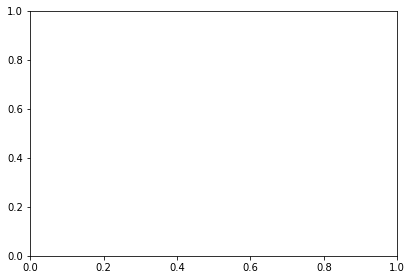

In [37]:
#Crear figura
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)  # Ajusta los márgenes según tus necesidades

def generar_grafico(def_load_step , Load_load_step , Load_creep_step , def_creep_step , Load_download_step , def_download_step ,
                    Load_reload_step , def_reload_step , Load_lockoff_step , def_lockoff_step): 

    ax.clear() #limpiar el gráfico, se requiere para no acumular graficos dsp de modificar los datos

    # Obtener el índice del último valor mayor o igual a cero
    max_indice_1 = next((i for i, valor in enumerate(def_load_step) if valor < 0), len(def_load_step))
    max_indice_2 = next((i for i, valor in enumerate(def_creep_step) if valor < 0), len(def_creep_step))
    max_indice_3 = next((i for i, valor in enumerate(def_download_step) if valor < 0), len(def_download_step))
    max_indice_4 = next((i for i, valor in enumerate(def_reload_step) if valor < 0), len(def_reload_step))
    max_indice_5 = next((i for i, valor in enumerate(def_lockoff_step) if valor < 0), len(def_lockoff_step))
    
    # Load curve
    ax.plot(def_load_step[:max_indice_1], Load_load_step[:max_indice_1], 'g', linewidth=1.5 , label="Carga") 
    # Creep curve
    ax.plot(def_creep_step[:max_indice_2], Load_creep_step[:max_indice_2 ], 'r', linewidth=1.5 , label="Creep")
    # Download curve
    ax.plot(def_download_step[:max_indice_3], Load_download_step[:max_indice_3 ], 'b', linewidth=1.5 , label="Descarga")
    # Reload curve
    ax.plot(def_reload_step[:max_indice_4], Load_reload_step[:max_indice_4 ], 'y', linewidth=1.5 , label="Recarga")
    # Lockoff curve
    ax.plot(def_lockoff_step[:max_indice_5], Load_lockoff_step[:max_indice_5 ], color='orange', linewidth=1.5 , linestyle='dashed' , label="Bloqueo")

    # Curvas límite 
    RL_Y = [Carga[0] , Carga[5]]
    ax.plot(RL_X(0.00).Vector_x() , RL_Y, color='gray', linewidth=1 , label='RL[0%]')
    ax.plot(RL_X(0.25).Vector_x() , RL_Y, color='gray', linewidth=1 , linestyle='dashed' , label='RL[25%]')
    ax.plot(RL_X(0.50).Vector_x() , RL_Y, color='gray', linewidth=1 , linestyle='dashed' , label='RL[50%]')
    ax.plot(RL_X(0.75).Vector_x() , RL_Y, color='gray', linewidth=1 , linestyle='dashed' , label='RL[75%]')
    ax.plot(RL_X(1.00).Vector_x() , RL_Y, color='gray', linewidth=1 , label='RL[100%]')

    if all(valor > 0 for valor in def_reload_step):
        slope_download , intercept_download , _, _ , _ = linregress(def_download_step[-3:] , Load_download_step[-3:])
        slope_reload , intercept_reload , _, _ , _     = linregress(def_reload_step[-3:] , Load_reload_step[-3:])

        slope_average = (slope_download + slope_reload) / 2
        intercept_average = (intercept_download + intercept_reload) / 2

        x_average = [0 , max(def_reload_step)]
        y_average = [intercept_average , max(def_reload_step)*slope_average + intercept_average]
        ax.plot(x_average, y_average , 'r', linewidth=1 , linestyle='dashed')


    # Configurar el gráfico
    ax.set_xlabel('Deformación [mm]')
    ax.set_ylabel('Carga [kN]')

    # Limits
    ax.set_xlim(RL_X(1.00).Vector_x()[0] , RL_X(1.00).Vector_x()[1])  
    ax.set_ylim(Carga[0] , Carga[5] + 50) 

    # Legend location
    ax.legend(loc='lower right' , fontsize=8)
    
    # Agregamos grid y lo configuramos
    ax.grid(color='gray', linestyle='dotted', linewidth=0.5)

    #Mostrar el gráfico
    canvas.draw()

#Generar el marco para el gráfico
canvas = FigureCanvasTkAgg(fig, master=frm)
canvas_widget = canvas.get_tk_widget()
canvas_widget.grid(column=5, row= 9 , rowspan=20, columnspan=10)
canvas_widget.config(width=600, height=400)

toolbar = NavigationToolbar2Tk(canvas, frm , pack_toolbar=False)
toolbar.update()
toolbar.grid(row=8, column=6, columnspan=3)



## Vincular Datos y Gráfico

In [38]:
def Funciones(evento=None):
    Deformation.clear()   # Limpiar el vector Carga y Deformación para que al generar una nueva curva no quede la curva anterior
    Carga.clear()
    def_load_step , Load_load_step , Load_creep_step , def_creep_step , Load_download_step , def_download_step , Load_reload_step , def_reload_step , Load_lockoff_step , def_lockoff_step = obtener_textos()  
    generar_grafico(def_load_step , Load_load_step , Load_creep_step , def_creep_step , Load_download_step , def_download_step , Load_reload_step , def_reload_step , Load_lockoff_step , def_lockoff_step)

def actualizar_label(entry_var, label, load):
    Test_load.set(float(Test_coefficient.get())*float(Carga_servicio.get()))
    valor = float(entry_var.get())
    resultado = round(valor / (Test_load.get()/area_gato.get()) , 1)
    label.config(text=f"{resultado}%" )
    texto = round( valor*area_gato.get() / 100 , 1)
    load.config(text=texto)

def principal(evento):
    for entry, label, load in zip(Val_Presion, Val_label, Val_Carga):
        actualizar_label(entry, label, load)
    Funciones(evento)

# Asociar el evento <Return> a la función principal
for entry, lect in zip(Val_Presion , Val_Lect):
    entry.bind("<Return>", principal)
    lect.bind("<Return>", principal)


## Contenido ejecutable de la Ventana

In [39]:
# Al botón le asigna el comando cerrar
Button_1 = Button(frm, text="Cerrar", command=root.destroy).grid(column=9, row=0)

# Generar boton de grafico
Button_2 = Button(frm, text="Graficar" , command=Funciones).grid(column=10,row=0)

## Ejecutor de la ventana

In [40]:
root.mainloop() # Este método hará un bucle eterno, esperando eventos del usuario, hasta que el usuario salga del programa...
                # ... ya sea cerrando la ventana, o terminando el programa con una interrupción de teclado en la consola.

Lecturas ingresadas: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Cargas ingresadas: [144.0, 240.0, 480.0, 720.0, 912.0, 960.0, 960.0, 960.0, 960.0, 960.0, 960.0, 816.0, 720.0, 624.0, 480.0, 624.0, 720.0, 816.0, 960.0, 912.0, 768.0, 672.0, 576.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[144.0, 240.0, 480.0, 720.0, 912.0, 960.0]
[960.0, 960.0, 960.0, 960.0, 960.0, 960.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 91.2]
[0.0, 102.6]
[0.0, 114.0]
[0.0, 125.4]
[0.0, 136.79999999999998]
[0.0, 136.79999999999998]
[0.0, 136.79999999999998]
